# Ejercicio 1

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 10)
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('breast_cancer.csv')
df = df.drop(columns=['id', 'Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

Por lo tanto, los tumores Benignos son 0 y los Malignos son 1.

# Ejercicio 2

<AxesSubplot:xlabel='radius_se', ylabel='Count'>

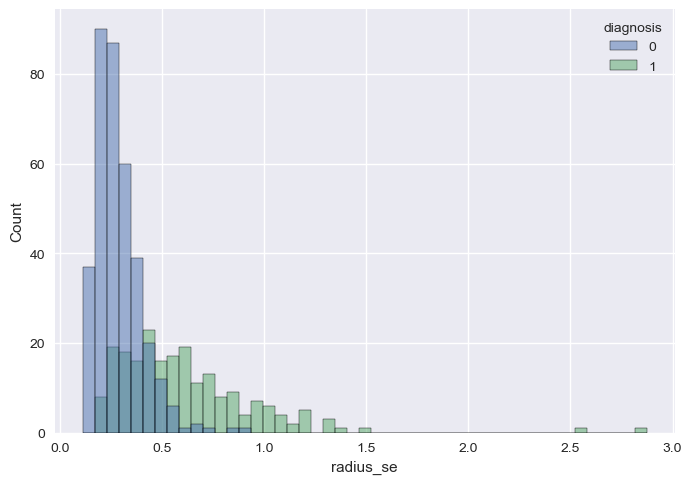

In [13]:
sns.histplot(data=df, x='radius_se', hue='diagnosis')